# Boosting Techniques | Assignment

Assignment Code: DA-AG-015

Arghadeep Misra |
+91 8250675419

---

Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

Answer -


Boosting is an ensemble method. It combines many weak learners to make one strong learner. A weak learner is a model that does only a little better than random guessing. Boosting trains models one after another. Each new model focuses more on the mistakes of the previous ones.

For example, in AdaBoost the algorithm increases the weight of wrong predictions so the next learner tries harder on them. In Gradient Boosting, each new learner is fitted on the errors left over from the earlier ones. At the end, all the learners are combined, often by weighted voting or adding their outputs.

This step-by-step correction makes the final model more accurate than any single weak learner.

---

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer -


AdaBoost and Gradient Boosting are both boosting methods, but they train models in different ways.

AdaBoost works by giving higher weights to the data points that were classified wrong by the previous model. The next weak learner focuses more on those hard cases. At the end, it combines all weak learners with weights based on their accuracy.

Gradient Boosting does not use weights in the same way. Instead, it builds each new model on the residual errors of the previous models. The idea is that each new learner predicts the part the old ones missed. It uses gradient descent to reduce the loss function step by step.

In short: AdaBoost adjusts weights of samples, Gradient Boosting reduces errors using gradients.

---

Question 3 - How does regularization help in XGBoost?

Answer -

Regularization in XGBoost helps control overfitting. Overfitting happens when the model learns noise from training data instead of real patterns.

XGBoost adds penalty terms to its objective function. These penalties control the complexity of trees. The L1 penalty (like Lasso) can make some weights zero, removing unnecessary features. The L2 penalty (like Ridge) reduces the size of weights, making the model more stable.

By using these penalties, the model becomes simpler, more general, and performs better on new unseen data.

---

Question 4 - Why is CatBoost considered efficient for handling categorical data?

Answer -

CatBoost is designed to work well with categorical features. Normally, models need categorical values to be converted into numbers using one-hot encoding or label encoding. These methods can make the dataset very large or add noise.

CatBoost avoids this by using a special technique called target-based encoding with random permutations. It turns categories into numerical values while reducing the risk of overfitting. It also handles high-cardinality features, where there are many unique categories, without making the dataset explode in size.

Because of this built-in method, CatBoost saves preprocessing time and improves performance when data has many categorical variables.

---

Question 5 - What are some real-world applications where boosting techniques are preferred over bagging methods?

Answer -

Boosting is often better than bagging when small improvements in accuracy are important.

Finance - Boosting models are used to detect fraud in credit card transactions where small errors can cost a lot.

Healthcare - Boosting is applied in predicting diseases from medical records. The step-by-step corrections improve sensitivity.

Marketing - Companies use boosting to predict customer churn and buying behavior more accurately.

Online platforms - Boosting helps in ranking search results and recommending products.

Risk management - Banks use boosting to assess loan default chances with better precision.

In these areas, boosting is preferred because it reduces bias and catches complex patterns that bagging sometimes misses.

---

Question 6 - Write a Python program to train an AdaBoost Classifier on the Breast Cancer dataset and print the model accuracy.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9649122807017544


---

Question 7 - Write a Python program to train a Gradient Boosting Regressor on the California Housing dataset and evaluate performance using R-squared score.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = GradientBoostingRegressor(random_state=42)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))


R-squared: 0.7756446042829697


---

Question 8 - Write a Python program to train an XGBoost Classifier on the Breast Cancer dataset, tune the learning rate using GridSearchCV, and print the best parameters and accuracy.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Params: {'learning_rate': 0.1}
Accuracy: 0.956140350877193


---

Question 9 - Write a Python program to train a CatBoost Classifier and plot the confusion matrix using seaborn.

In [7]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.7 MB/s eta 0:00:00


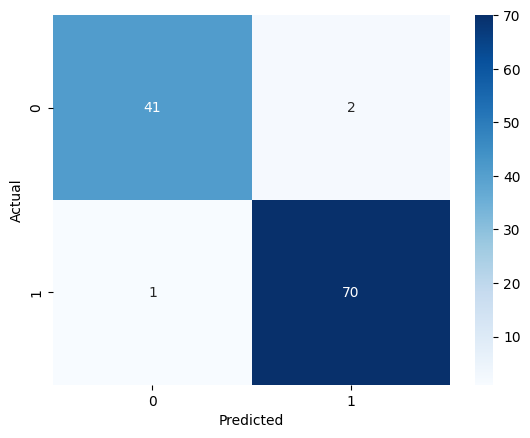

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


---

Question 10 - You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, has missing values, and includes both numeric and categorical features. Describe your step-by-step data science pipeline using boosting techniques.

Answer -


1/ Data preprocessing

2/ Handle missing values: use mean/median for numeric columns, most frequent for categorical.

3/ Encode categorical features: CatBoost can handle them directly, while XGBoost/AdaBoost need one-hot or label encoding.

4/ Scale numeric values if needed, but boosting models usually work fine without scaling.

5/ Model choice

6/ CatBoost is a strong option because it handles categorical data well.

7/ If the dataset has many numeric features and fewer categories, XGBoost is also a good choice.

8/ AdaBoost is simpler, but less powerful for large complex datasets.

9/ Hyperparameter tuning

10/ Use GridSearchCV or RandomizedSearchCV.

11/ Tune learning_rate, max_depth, n_estimators.

12/ Use cross-validation to avoid overfitting.

13/ Evaluation metrics

14/ Since the dataset is imbalanced, accuracy is not enough.

15/ Use metrics like F1-score, Precision, Recall, and especially AUC-ROC to judge performance.

=> Business benefit

=> The model helps the company reduce risk by identifying high default probability customers early.

=> This allows smarter loan approvals, better credit scoring, and lower financial losses.

=> It also helps in offering safer products to reliable customers.